# Figure 1. Light Curves for our sample

Now that we have settled on a samples (that have good quality SEDs, `generate_sed_sample.ipynb`), let's generate a figure with all the light curves of the SNe in the sample.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import re
import corner

from lltypeiip.config import config
from lltypeiip.photometry import get_wise_lc_data, get_ztf_lc_data, convert_ZTF_mag_mJy, plot_combined_lc
from lltypeiip.sed import build_multi_epoch_seds_from_tail, plot_sed
from lltypeiip.dusty import fit_grid_to_sed, plot_best_fit_dusty_model

from alerce.core import Alerce

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sed_sample_path = "/home/cal/analam/Documents/LL_typeIIP/sed_sample.txt"

with open(sed_sample_path, 'r') as file:
    oids = [line.rstrip() for line in file]
print(f"{len(oids)} OIDs")
print(oids)

20 OIDs
['ZTF18abjndhh', 'ZTF19aadnxnl', 'ZTF19aanrrqu', 'ZTF19aapafit', 'ZTF19aarykkb', 'ZTF19acbwejj', 'ZTF19aclobbu', 'ZTF21aagtqna', 'ZTF21ablvzhp', 'ZTF21abnlhxs', 'ZTF21abouuat', 'ZTF21acpqqgu', 'ZTF22aativsd', 'ZTF22aaywnyg', 'ZTF22abtspsw', 'ZTF23aanymcl', 'ZTF23aaxadel', 'ZTF23abaxtlq', 'ZTF23abnogui', 'ZTF24aaemydm']


In [4]:
alerce = Alerce()
oid = "ZTF22abtspsw"

wise_resdict = get_wise_lc_data(oid)
ztf_resdict = get_ztf_lc_data(oid, alerce, doLC=False, doStamps=False, add_forced=True)
ztf_resdict = convert_ZTF_mag_mJy(ztf_resdict, forced=True)

Saved ztf_resdict for ZTF22abtspsw to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
ztf_resdict['forced']['ZTF_r']['mjd'][0]

np.float64(58214.18157410016)

In [ ]:
ztf_resdict['lc_det']

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,sigmagapbig,rfid,has_stamp,corrected,dubious,step_id_corr,phase,parent_candid,flux_mJy,flux_err_mJy
0,ztf,59897.392801,2143392805415015003,2,2143392805415,19.039204,1,2143,4.170939,15.764947,...,0.0186,466120254.0,True,False,False,1.1.6,0.0,NaN,1.794930,0.050552
1,ztf,59897.482523,2143482525415015007,1,2143482525415,19.403004,1,2143,4.206230,15.475933,...,0.0113,466120154.0,True,False,False,1.1.6,0.0,NaN,2.342357,0.071867
2,ztf,59900.412072,2146412075415015017,2,2146412075415,18.842165,1,2146,4.495359,15.268787,...,0.0088,466120254.0,True,False,False,1.1.6,0.0,NaN,2.834728,0.091548
3,ztf,59900.484803,2146484805415015005,1,2146484805415,19.755325,1,2146,4.196573,15.085270,...,0.0065,466120154.0,True,False,False,1.1.6,0.0,NaN,3.356744,0.085265
4,ztf,59902.443993,2148443995415015001,1,2148443995415,19.669770,1,2148,4.215713,14.961187,...,0.0061,466120154.0,True,False,False,1.1.6,0.0,NaN,3.763149,0.131769
5,ztf,59902.507500,2148507495415015001,2,2148507495415,19.723051,1,2148,4.207095,15.090557,...,0.0071,466120254.0,True,False,False,1.1.6,0.0,NaN,3.340438,0.076693
6,ztf,59904.467708,2150467705415015004,2,2150467705415,20.325233,1,2150,4.220332,15.010786,...,0.0065,466120254.0,True,False,False,1.1.6,0.0,NaN,3.595107,0.134444
7,ztf,59906.443403,2152443405415015060,2,2152443405415,20.180601,1,2152,4.229968,15.025545,...,0.0064,466120254.0,True,False,False,1.1.6,0.0,NaN,3.546568,0.095652
8,ztf,59909.425810,2155425815415015005,2,2155425815415,20.311000,1,2155,4.244880,15.054000,...,0.0066,NaN,False,False,False,1.1.6,0.0,2.155465e+18,3.454827,0.102324
9,ztf,59909.464919,2155464915415015005,1,2155464915415,20.372055,1,2155,4.184543,15.093637,...,0.0060,466120154.0,True,False,False,1.1.6,0.0,NaN,3.330976,0.121201


Processing ZTF18abjndhh...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF18abjndhh to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF18abjndhh_cand_lc.png
Processing ZTF19aadnxnl...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF19aadnxnl to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF19aadnxnl_cand_lc.png
Processing ZTF19aanrrqu...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF19aanrrqu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF19aanrrqu_cand_lc.png
Processing ZTF19aapafit...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF19aapafit to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF19aapafit_cand_lc.png
Processing ZTF19aarykkb...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF19aarykkb to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF19aarykkb_cand_lc.png
Processing ZTF19acbwejj...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF19acbwejj to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF19acbwejj_cand_lc.png
Processing ZTF19aclobbu...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF19aclobbu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF19aclobbu_cand_lc.png
Processing ZTF21aagtqna...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF21aagtqna to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF21aagtqna_cand_lc.png
Processing ZTF21ablvzhp...
Saved ztf_resdict for ZTF21ablvzhp to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF21ablvzhp_cand_lc.png
Processing ZTF21abnlhxs...


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF21abnlhxs to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF21abnlhxs_cand_lc.png
Processing ZTF21abouuat...


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF21abouuat to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF21abouuat_cand_lc.png
Processing ZTF21acpqqgu...


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns
/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non

Saved ztf_resdict for ZTF21acpqqgu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF21acpqqgu_cand_lc.png
Processing ZTF22aativsd...
Saved ztf_resdict for ZTF22aativsd to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF22aativsd_cand_lc.png
Processing ZTF22aaywnyg...


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns
/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non

Saved ztf_resdict for ZTF22aaywnyg to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF22aaywnyg_cand_lc.png
Processing ZTF22abtspsw...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF22abtspsw to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF22abtspsw_cand_lc.png
Processing ZTF23aanymcl...
Saved ztf_resdict for ZTF23aanymcl to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF23aanymcl_cand_lc.png
Processing ZTF23aaxadel...


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns
/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non

Saved ztf_resdict for ZTF23aaxadel to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF23aaxadel_cand_lc.png
Processing ZTF23abaxtlq...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF23abaxtlq to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF23abaxtlq_cand_lc.png
Processing ZTF23abnogui...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


Saved ztf_resdict for ZTF23abnogui to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF23abnogui_cand_lc.png
Processing ZTF24aaemydm...
Saved ztf_resdict for ZTF24aaemydm to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/light_curves/ZTF24aaemydm_cand_lc.png


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:193: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  Returns


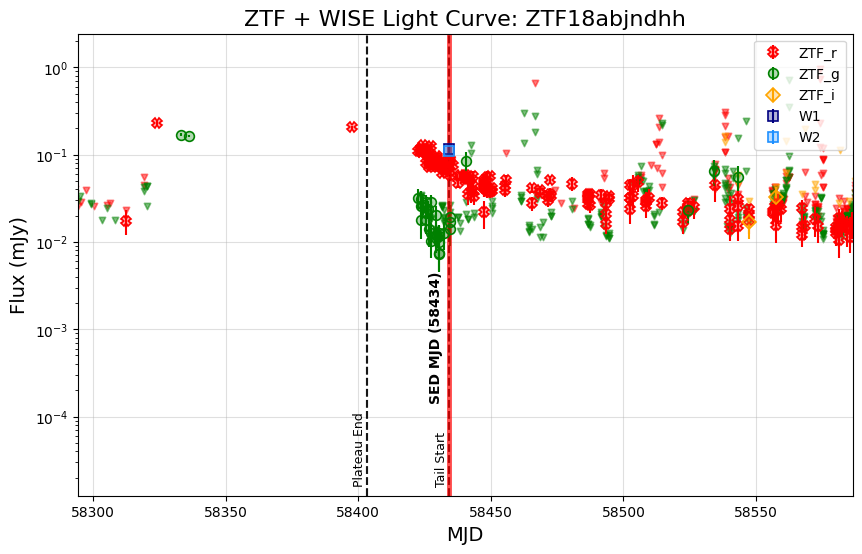

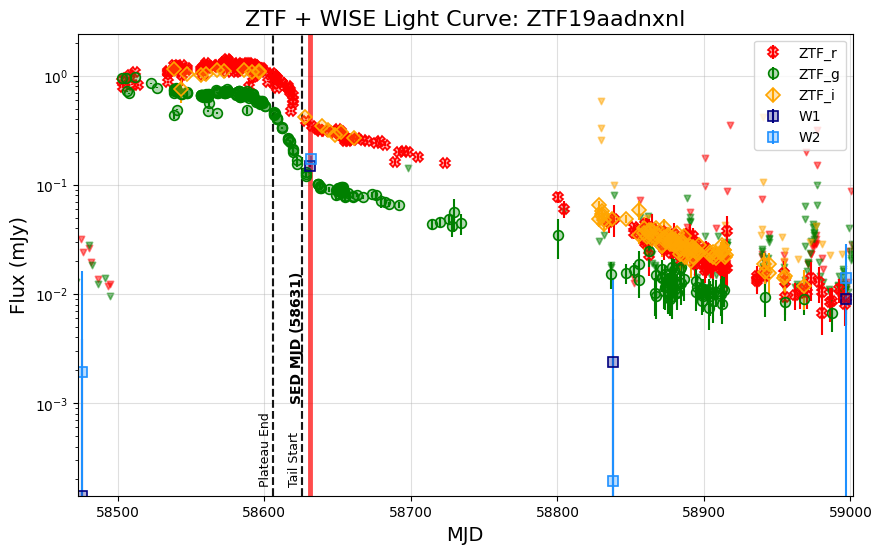

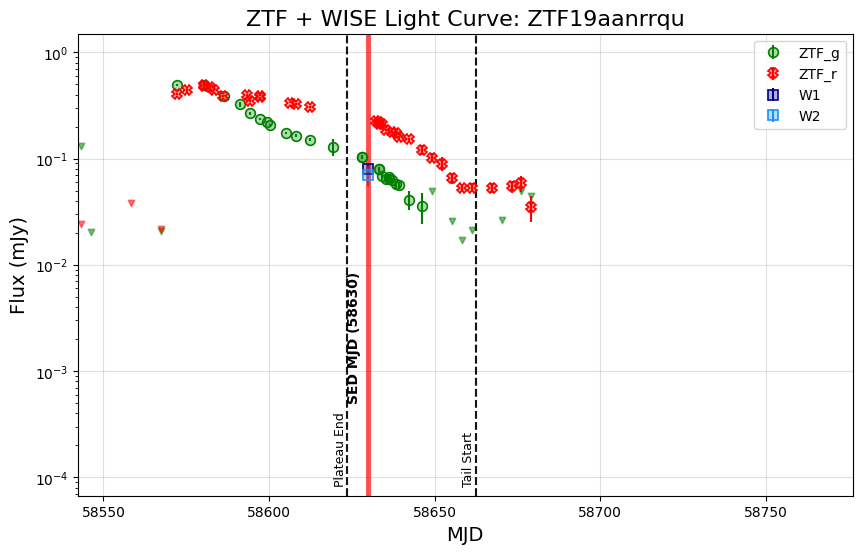

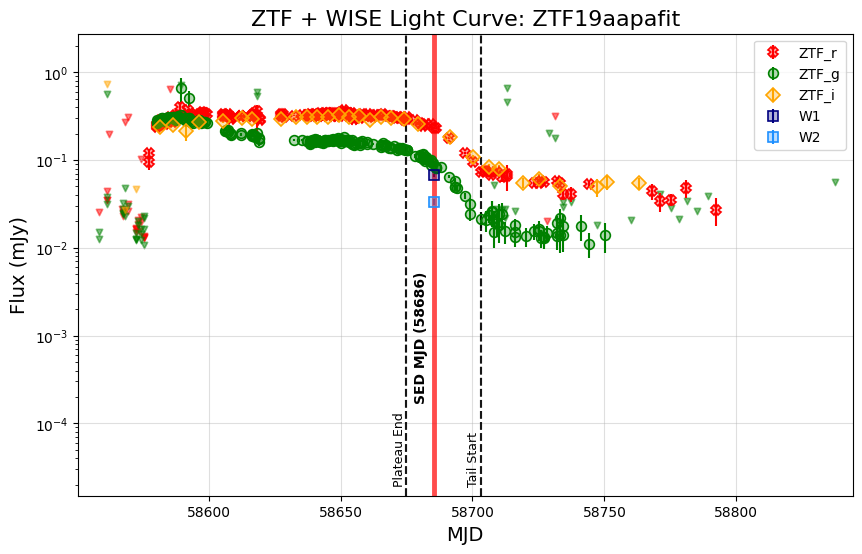

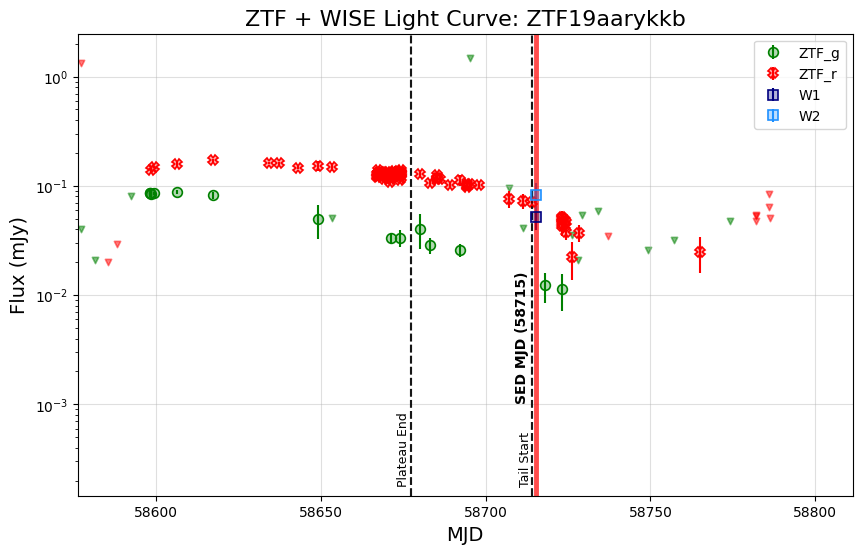

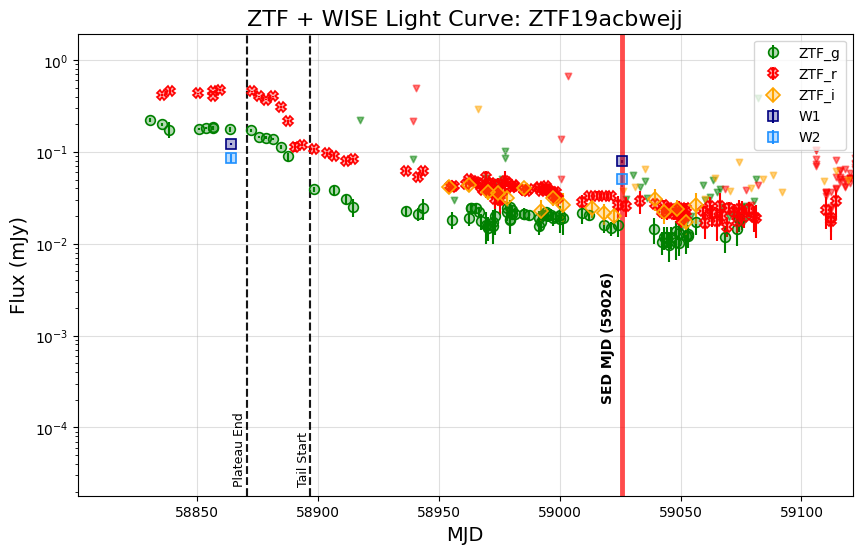

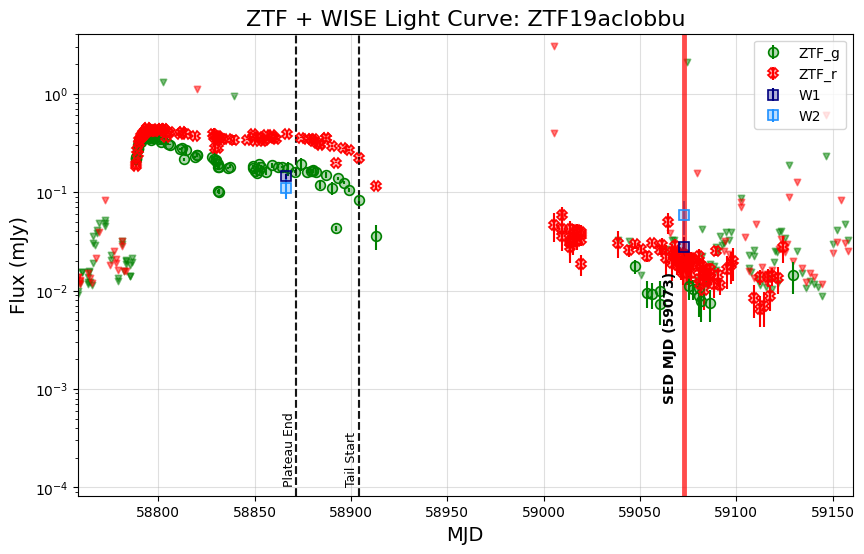

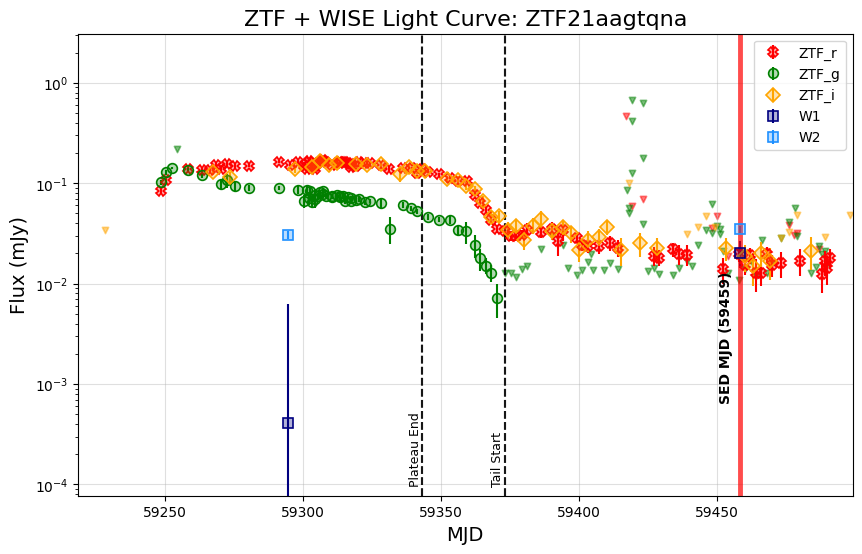

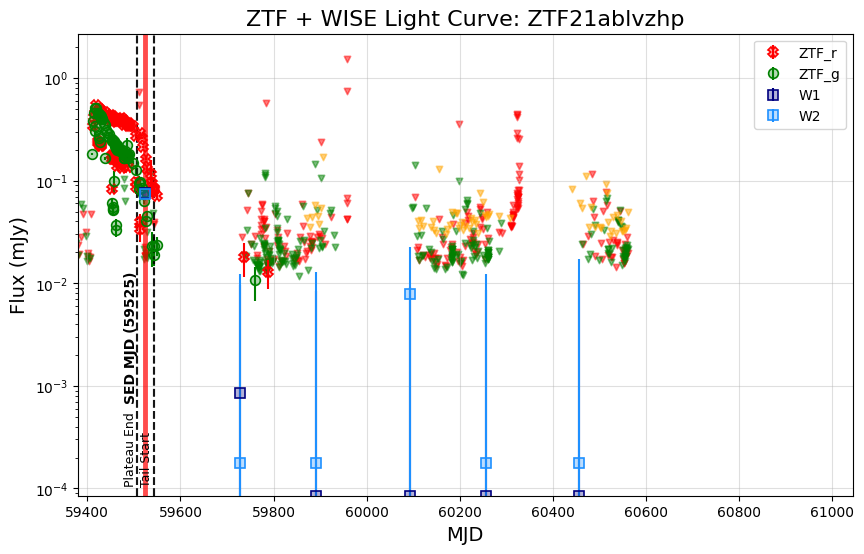

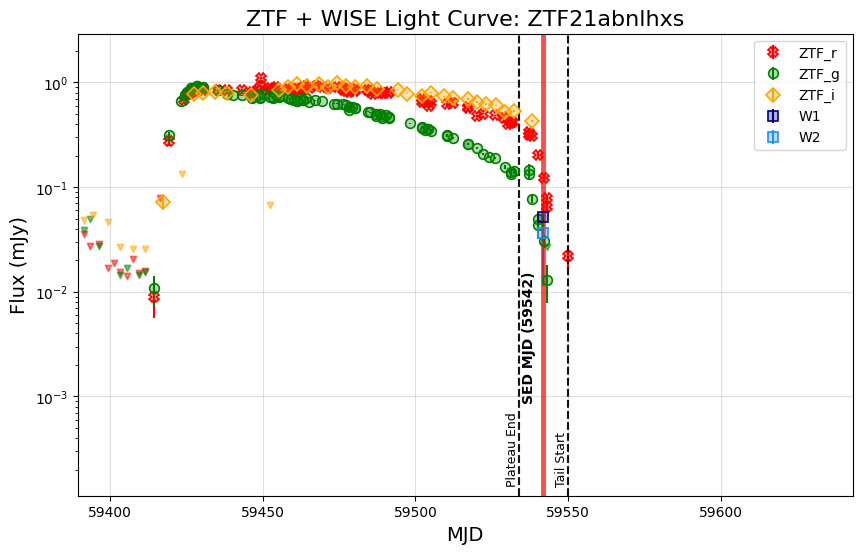

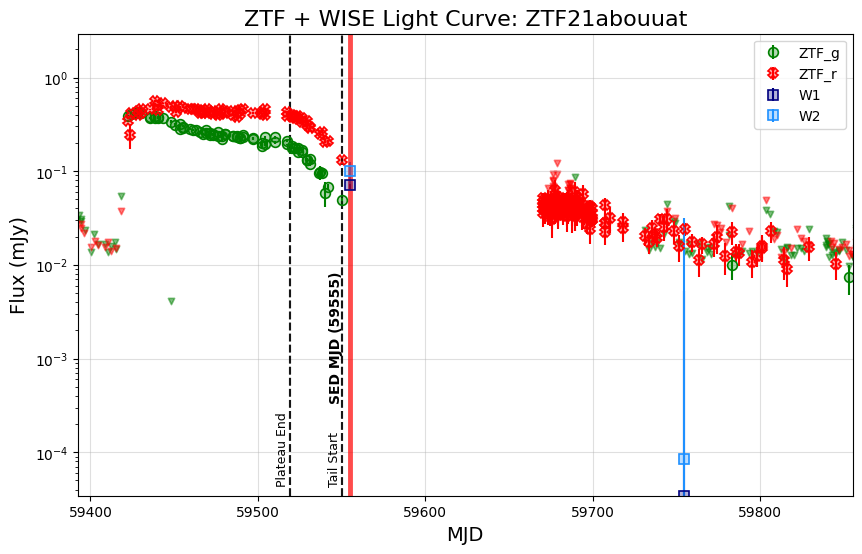

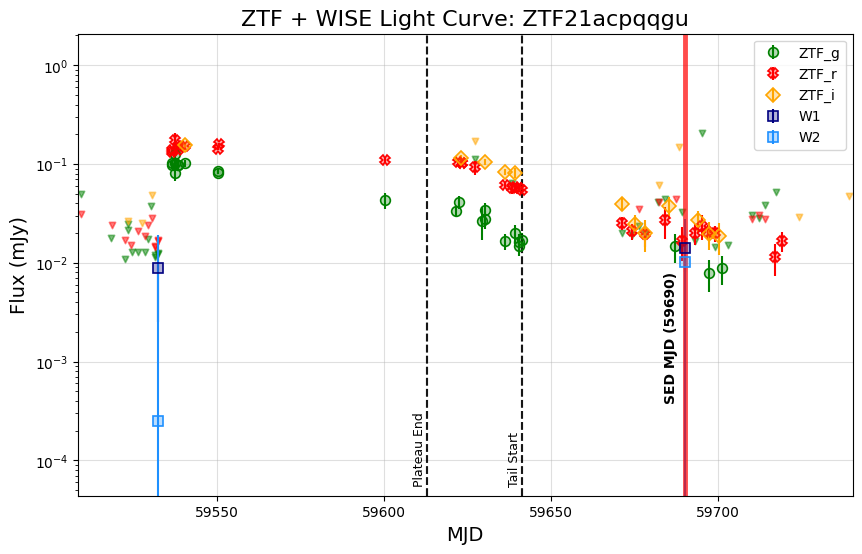

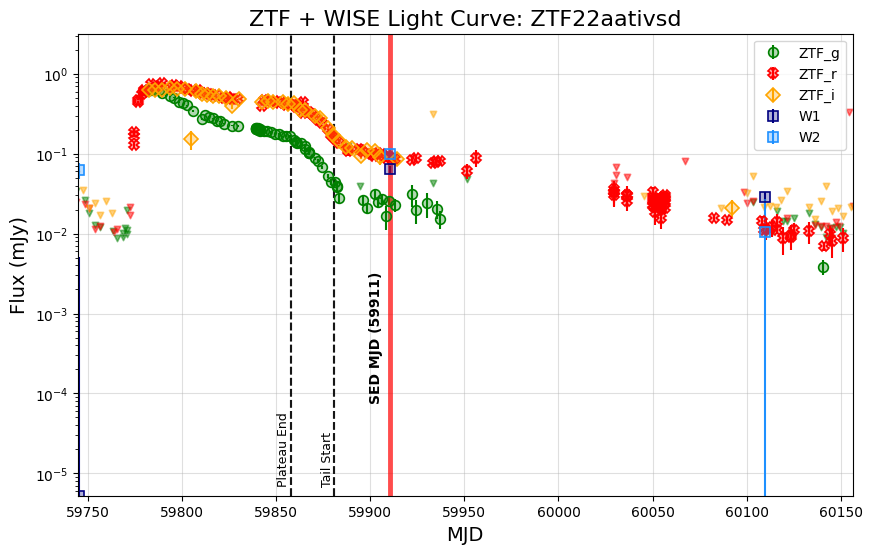

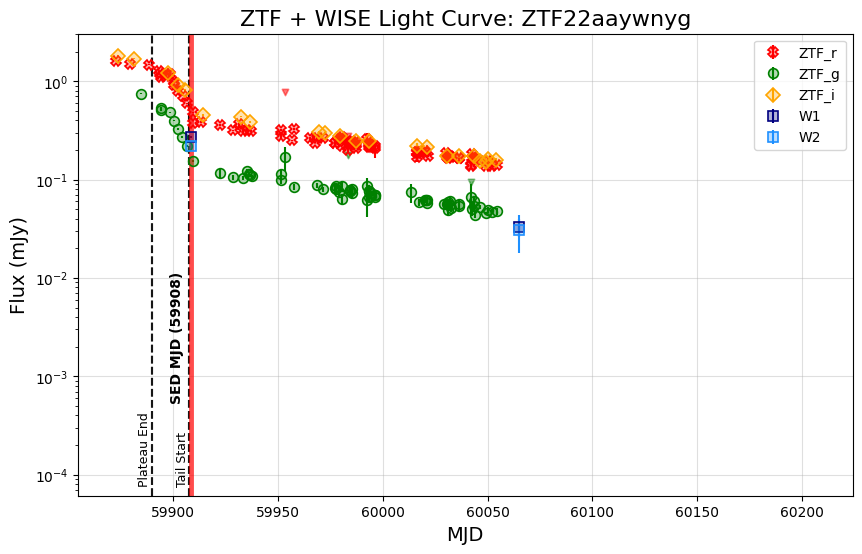

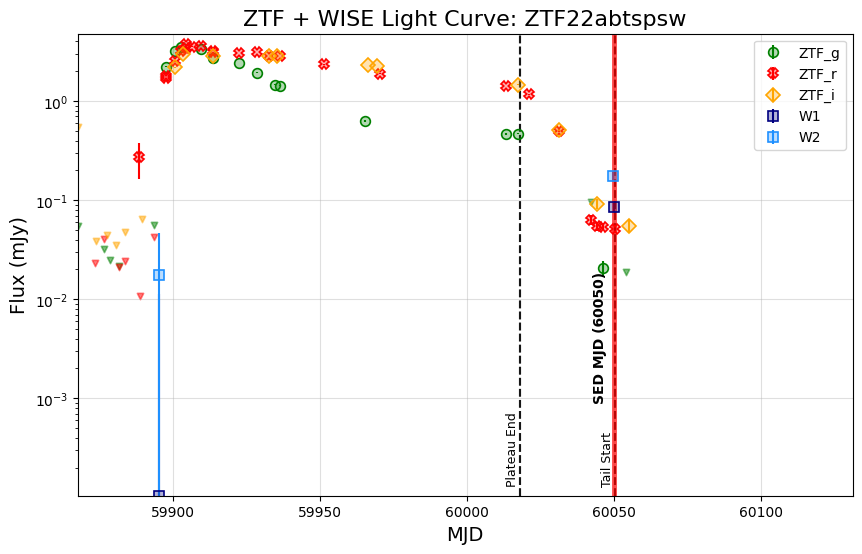

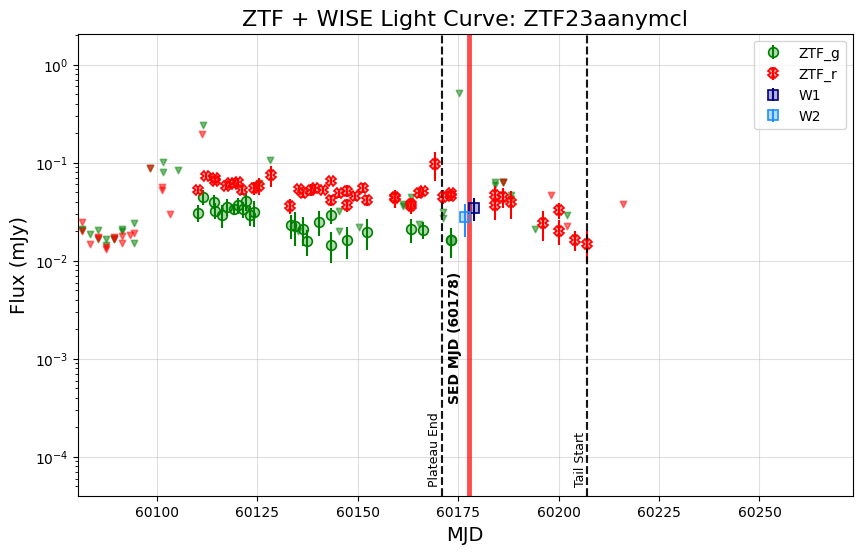

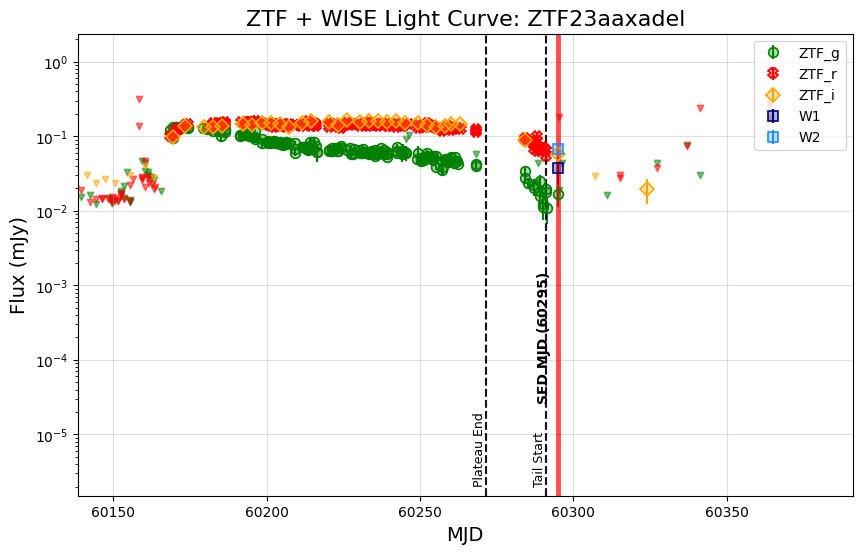

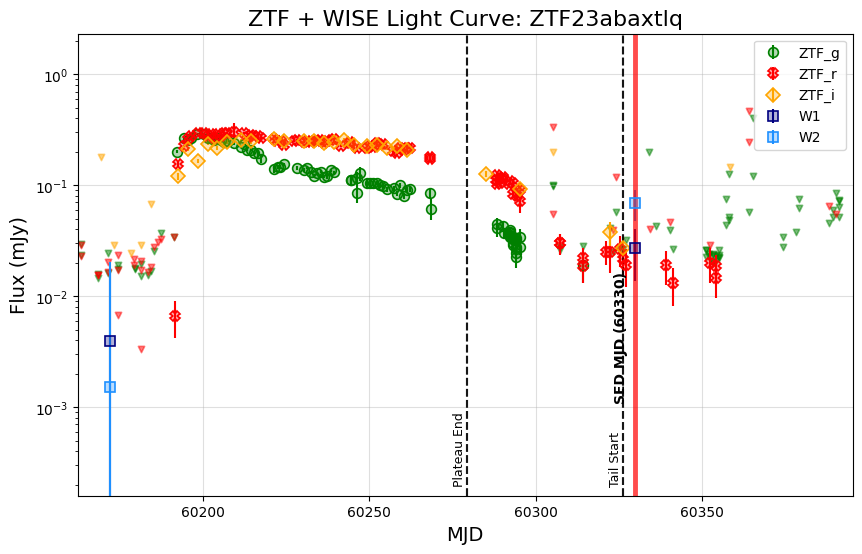

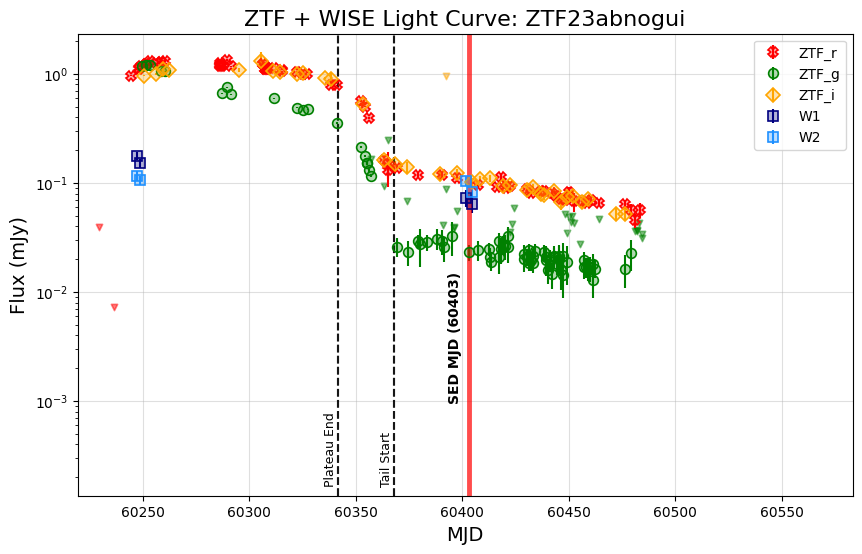

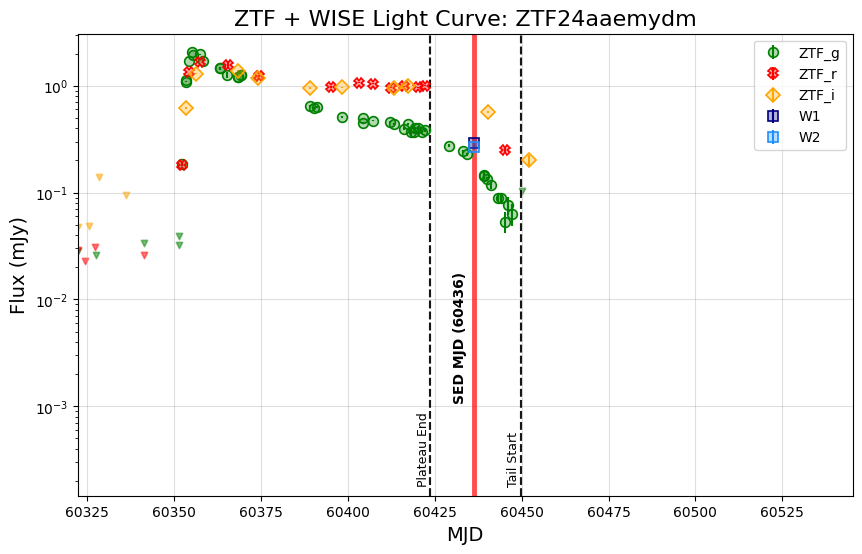

In [ ]:
for oid in oids:
    print(f"Processing {oid}...")
    wise_resdict = get_wise_lc_data(oid)
    ztf_resdict = get_ztf_lc_data(oid, alerce, doLC=False, doStamps=False, add_forced=True)
    ztf_resdict = convert_ZTF_mag_mJy(ztf_resdict, forced=True)
    
    seds = build_multi_epoch_seds_from_tail(
        ztf_resdict, wise_resdict, 
        min_detected_bands=4,
        require_wise_detection=True,
        max_dt_ztf=5.0,
        max_dt_wise=5.0
    )

    if len(seds) > 0:
        best = max(seds, key=lambda sed: (len(sed["bands"]), sed["mjd"]))
        sed_mjd = best['mjd']

    plot_combined_lc(ztf_resdict, wise_resdict, oid=oid, 
                 ztf_flux=True, mode="overlay", scale_wise=True, baseline_ref="wise_parity",
                 ref_band="r", logy=True, mark_plateau_end=True, mark_tail_start=True, mark_custom_mjd=sed_mjd,
                 savepath=f"/home/cal/analam/Documents/LL_typeIIP/figures/light_curves/{oid}_cand_lc.png");
